In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

1. Utilizando imagem relogio.tif e faça uma reamostragem de seus pixels para 300, 150 e 72 dpi. Sabe-se que a imagem original possui 1250 dpi. Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

Tamanho da imagem :  (3692, 2812)


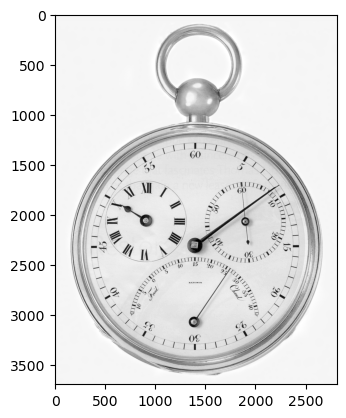

In [2]:
img = cv2.imread("relogio.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin=0, vmax=255);
print('Tamanho da imagem : ',img.shape)


In [7]:
def reamostragem(img, dpi):
    linhas = img.shape[0]
    colunas = img.shape[1];
    dpi_original = 1250
    razao_dpi = dpi / dpi_original
    linhas_dpi = int(linhas * razao_dpi)
    colunas_dpi = int(colunas * razao_dpi)
    nova_img_dpi = np.zeros((linhas_dpi, colunas_dpi), dtype=np.uint8)
    for i in range(linhas_dpi):
        for j in range(colunas_dpi):
            x = int(i / razao_dpi)
            y = int(j / razao_dpi)
            nova_img_dpi[i, j] = img[x, y]
            
    plt.imshow(nova_img_dpi, cmap='gray', vmin=0, vmax=255);
    plt.show()

    print('Tamanho da nova imagem :', nova_img_dpi.shape)

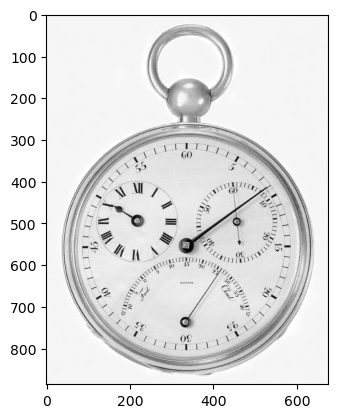

Tamanho da nova imagem : (886, 674)


In [8]:
reamostragem(img, 300)

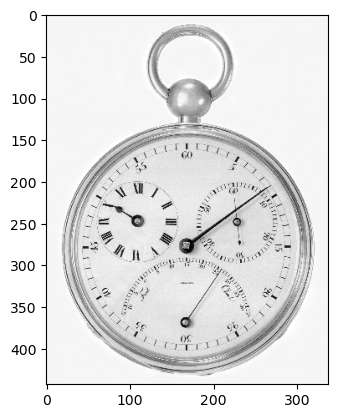

Tamanho da nova imagem : (443, 337)


In [9]:
reamostragem(img, 150)

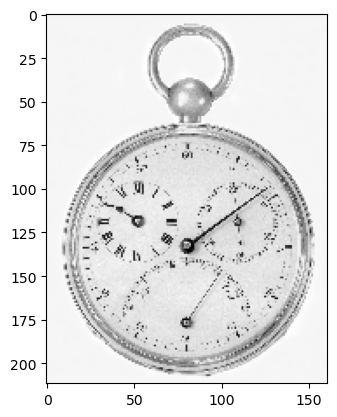

Tamanho da nova imagem : (212, 161)


In [10]:
reamostragem(img, 72)

2. Utilizando a imagem ctskull-256.tif, refaça a quantização de seus pixels utilizando de 7 a 1 bit(s) por pixel. Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

Tamanho da imagem :  (452, 374)


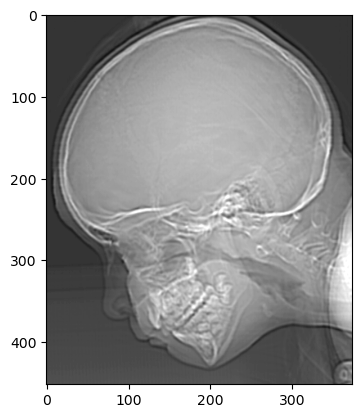

In [11]:
img_skull = cv2.imread("ctskull-256.tif", cv2.IMREAD_GRAYSCALE)

plt.imshow(img_skull, cmap='gray', vmin=0, vmax=255);
print('Tamanho da imagem : ',img_skull.shape)

linhas = img_skull.shape[0]
colunas = img_skull.shape[1];

In [12]:
def img_quantizada(qtd_bits):
    razao = 255 / (2**qtd_bits - 1)
    img_quant = np.zeros_like(img_skull, dtype=np.uint8)
    for i in range(linhas):
        for j in range(colunas):
            valor_img_skull = img_skull[i, j]
            valor_quantizado = int(valor_img_skull / razao + 0.5) * razao
            img_quant[i, j] = valor_quantizado
    return img_quant

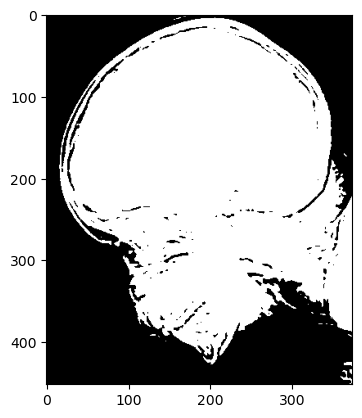

In [13]:
img_qt_1 = img_quantizada(1);
img_qt_2 = img_quantizada(2);
img_qt_3 = img_quantizada(3);
img_qt_4 = img_quantizada(4);
img_qt_5 = img_quantizada(5);
img_qt_6 = img_quantizada(6);
img_qt_7 = img_quantizada(7);

plt.imshow(img_qt_1, cmap='gray', vmin=0, vmax=255)
plt.show()

(-0.5, 373.5, 451.5, -0.5)

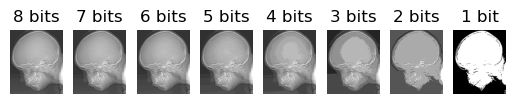

In [14]:
#subplotagem 1
plt.subplot(1, 8, 1)
plt.title('8 bits')
plt.imshow(img_skull, cmap='gray', vmin=0, vmax=255);
plt.axis('off')

#subplotagem 2
plt.subplot(1, 8, 2)
plt.title('7 bits')
plt.imshow(img_qt_7, cmap='gray', vmin=0, vmax=255);
plt.axis('off')

#subplotagem 3
plt.subplot(1, 8, 3)
plt.title('6 bits')
plt.imshow(img_qt_6, cmap='gray', vmin=0, vmax=255);
plt.axis('off')

#subplotagem 4
plt.subplot(1, 8, 4)
plt.title('5 bits')
plt.imshow(img_qt_5, cmap='gray', vmin=0, vmax=255);
plt.axis('off')

#subplotagem 5
plt.subplot(1, 8, 5)
plt.title('4 bits')
plt.imshow(img_qt_4, cmap='gray', vmin=0, vmax=255);
plt.axis('off')

#subplotagem 6
plt.subplot(1, 8, 6)
plt.title('3 bits')
plt.imshow(img_qt_3, cmap='gray', vmin=0, vmax=255);
plt.axis('off')

#subplotagem 7
plt.subplot(1, 8, 7)
plt.title('2 bits')
plt.imshow(img_qt_2, cmap='gray', vmin=0, vmax=255);
plt.axis('off')

#subplotagem 8
plt.subplot(1, 8, 8)
plt.title('1 bit')
plt.imshow(img_qt_1, cmap='gray', vmin=0, vmax=255);
plt.axis('off')